In [11]:
from CyclicLoadSimulation import Experiment, Wire

import numpy as np
import matplotlib.pyplot as plt

#### Initialisation

In [5]:
nr_wires = 35
nr_strands = 5

mu_fatigue_initial = 500
sigm_fatigue_initial = 200

# inner wires
wires = [Wire(i, True, True, np.random.normal(mu_fatigue_initial, sigm_fatigue_initial)) 
         for i in range(nr_strands)]
# inner strand
wires += [Wire(i, False, True, np.random.normal(mu_fatigue_initial, sigm_fatigue_initial)) 
         for i in range(nr_strands,nr_strands+6)]
# outer strand
wires += [Wire(i, False, True, np.random.normal(mu_fatigue_initial, sigm_fatigue_initial)) 
         for i in range(nr_strands+6,nr_wires)]

exp = Experiment(id='SB01', stress_range_0=200, fctm=3.89,
                 nr_wires=nr_wires, nr_strands=nr_strands, 
                 wires=wires)

In [3]:
exp?

Type:           Experiment
String form:    <CyclicLoadSimulation.Experiment object at 0x10486f2e8>
File:           ~/TuDo/bridges/CyclicLoadSimulation/CyclicLoadSimulation.py
Docstring:     
This class describes the experiment setup. 
Both the characteristics of a specific experiment and
of the simulation are included.
Moreover, the state during a simulation run can be acessed.
Init docstring:
Initialised the experiment.

Parameters
-----------
id: string
    Identifier of the test beam.
nr_wires: int
    Total number of wires in the test beam.
nr_strands: int
    Total number of strands.
stress_range_0: float
    Initial stress range in N/mm2.
fctm: float
    Concrete tensile strength in MPa.
wires: wire object
    All wires created with corresponding class.


In [4]:
exp.update_experiment?

Signature: exp.update_experiment(nr_cycles)
Docstring:
Method to update the experiment.
If a wire broke, the stress range, the number of broken wires, 
and the crack width needs to be updated. 
Moreover, the information on the cycle where the wire broke is appended
to an array for further references, as well as the corresponding crack width.
File:      ~/TuDo/bridges/CyclicLoadSimulation/CyclicLoadSimulation.py
Type:      method


#### Running an Experiment

In [6]:
while (exp.nr_broken < 20) and (exp.nr_cycles < 6e6):
    exp.update_wires()

#### Investigating the results

In [8]:
res = np.array(exp.arr)

In [9]:
res

array([[1.00000000e+00, 1.00000000e+00, 3.07990338e-01],
       [2.04690000e+05, 2.00000000e+00, 3.22095426e-01],
       [7.54369000e+05, 3.00000000e+00, 3.37310997e-01],
       [8.28898000e+05, 4.00000000e+00, 3.53763422e-01],
       [9.45153000e+05, 5.00000000e+00, 3.71598186e-01],
       [9.55718000e+05, 6.00000000e+00, 3.90983536e-01],
       [1.07952600e+06, 7.00000000e+00, 4.12114998e-01],
       [1.45739200e+06, 8.00000000e+00, 4.35220979e-01],
       [1.64030800e+06, 9.00000000e+00, 4.60569787e-01],
       [1.67222300e+06, 1.00000000e+01, 4.88478501e-01],
       [1.69634900e+06, 1.10000000e+01, 5.19324253e-01],
       [1.81264100e+06, 1.20000000e+01, 5.53558742e-01],
       [2.08053400e+06, 1.30000000e+01, 5.91727082e-01],
       [2.26026800e+06, 1.40000000e+01, 6.34492547e-01],
       [2.67059100e+06, 1.50000000e+01, 6.82669459e-01],
       [2.75060800e+06, 1.60000000e+01, 7.37267459e-01],
       [2.79222200e+06, 1.70000000e+01, 7.99551992e-01],
       [2.79476800e+06, 1.80000

Text(0,0.5,'Number of Cracks')

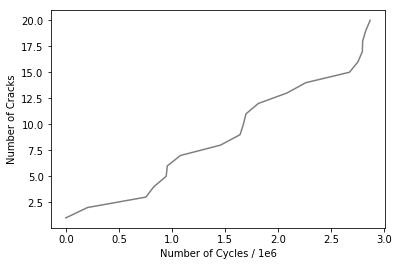

In [12]:
plt.plot(res[:,0]/1e6, res[:,1], color='black', alpha=0.5)
plt.xlabel('Number of Cycles / 1e6')
plt.ylabel('Number of Cracks')

Text(0,0.5,'Crack Width / mm')

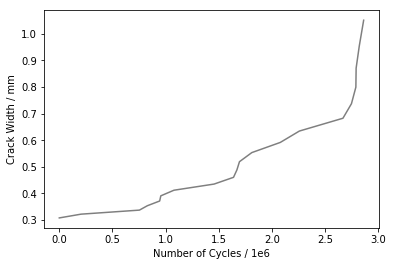

In [14]:
plt.plot(res[:,0]/1e6, res[:,2], color='black', alpha=0.5)
plt.xlabel('Number of Cycles / 1e6')
plt.ylabel('Crack Width / mm')